In [1]:
import numpy as np
import pandas as pd

In [2]:
D=[43,45,45,47]
E=[37,40,40,43]
F=[34,35,35,36]
A=[30,40,50,60]
B=[25,30,50,55]
C=[25,30,40,45]


In [4]:
print(np.mean(D),np.mean(E),np.mean(F))

45.0 40.0 35.0


In [5]:
print(np.mean(A),np.mean(B),np.mean(C))

45.0 40.0 35.0


In [7]:
#Both cases mean are same, still anova test will clear one and fail another

In [6]:
# MSTR : MEAN SQUARE TREATMENT: between sample variability

In [8]:
print(np.var(A),np.var(B),np.var(C))

125.0 162.5 62.5


In [12]:
G1_df=pd.DataFrame()
df1=pd.DataFrame({"group":"A","age":[30,40,50,60]})
df2=pd.DataFrame({"group":"B","age":[25,30,50,55]})
df3=pd.DataFrame({"group":"C","age":[25,30,40,45]})
G1_df=G1_df.append(df1)
G1_df=G1_df.append(df2)
G1_df=G1_df.append(df3)

In [13]:
G1_df

,group,age
0,A,30
1,A,40
2,A,50
3,A,60
0,B,25
1,B,30
2,B,50
3,B,55
0,C,25
1,C,30


In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols   #ols-ordinary least square

mod=ols("age~group",data=G1_df).fit()
aov_table=sm.stats.anova_lm(mod,typ=1)
print(aov_table)


           df  sum_sq     mean_sq         F    PR(>F)
group     2.0   200.0  100.000000  0.642857  0.548323
Residual  9.0  1400.0  155.555556       NaN       NaN


In [26]:
G2_df=pd.DataFrame()
df4=pd.DataFrame({"group":"D","age":[43,45,45,47]})
df5=pd.DataFrame({"group":"E","age":[37,40,40,43]})
df6=pd.DataFrame({"group":"F","age":[34,35,35,36]})
G2_df=G2_df.append(df4)
G2_df=G2_df.append(df5)
G2_df=G2_df.append(df6)

In [27]:
G2_df

,group,age
0,D,43
1,D,45
2,D,45
3,D,47
0,E,37
1,E,40
2,E,40
3,E,43
0,F,34
1,F,35


In [28]:
mod=ols("age~group",data=G2_df).fit()
aov_table=sm.stats.anova_lm(mod,typ=1)
print(aov_table)

           df  sum_sq     mean_sq          F   PR(>F)
group     2.0   200.0  100.000000  32.142857  0.00008
Residual  9.0    28.0    3.111111        NaN      NaN


In [29]:
from scipy.stats import f_oneway
f_oneway(A,B,C)

F_onewayResult(statistic=0.6428571428571429, pvalue=0.5483227164089495)

In [20]:
#Fail to reject Ho

In [30]:
from scipy.stats import f_oneway
f_oneway(D,E,F)

F_onewayResult(statistic=32.14285714285714, pvalue=7.970844367886858e-05)

In [22]:
#Rejecting Ho

one is accepted and the other is rejected because of the spread of data. 
if spread less, data is rejected. ---> if null hypothesis rejected, data rejected.

In [32]:
df=pd.read_csv("fair_pay_data.csv")
df.head(15)

,employee_id,department,salary,new_hire,job_level
0,1,Sales,103263.63550,No,Salaried
1,2,Engineering,80708.64104,No,Hourly
2,4,Engineering,60737.04786,Yes,Hourly
3,5,Engineering,99116.32328,Yes,Salaried
4,7,Engineering,51021.64386,No,Hourly
5,8,Engineering,98399.87194,No,Salaried
6,10,Engineering,57106.19622,Yes,Hourly
7,11,Engineering,55065.02797,No,Hourly
8,12,Engineering,77158.03415,No,Hourly
9,13,Engineering,48364.61591,No,Hourly


In [33]:
#check avg salary vs department

In [35]:
mod=ols("salary~department",data=df).fit()
aov_table=sm.stats.anova_lm(mod,typ=1)
print(aov_table)

                df        sum_sq       mean_sq         F    PR(>F)
department     2.0  1.081095e+09  5.405473e+08  1.509535  0.221356
Residual    1467.0  5.253160e+11  3.580886e+08       NaN       NaN


In [36]:
#Fails to reject Null hypothesis

In [37]:
#other way

In [39]:
a=df.salary.groupby(df["department"])
g1=a.get_group("Sales")
g2=a.get_group("Engineering")
g3=a.get_group("Finance")
f_oneway(g1,g2,g3)

F_onewayResult(statistic=1.5095348803367656, pvalue=0.22135584696393226)

In [40]:
mod=ols("salary~job_level",data=df).fit()
aov_table=sm.stats.anova_lm(mod,typ=1)
print(aov_table)

               df        sum_sq       mean_sq          F  PR(>F)
job_level     2.0  4.093172e+11  2.046586e+11  2564.3512     0.0
Residual   1467.0  1.170800e+11  7.980911e+07        NaN     NaN


In [42]:
#Rejects null hypothesis--> less p value

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

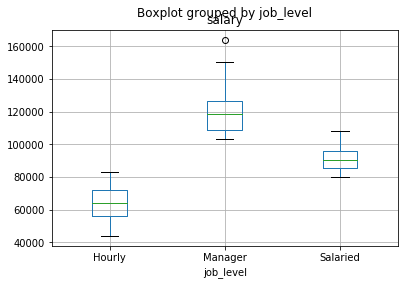

In [50]:
df.boxplot("salary","job_level")

In [60]:
#two way anova

In [52]:
df1=pd.read_csv("Cars93.csv")
df1.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [53]:
df1.columns

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [59]:
mod=ols("Price~DriveTrain",data=df1).fit()
aov_table=sm.stats.anova_lm(mod,typ=1)
print(aov_table)

              df      sum_sq    mean_sq          F    PR(>F)
DriveTrain   2.0  1722.28626  861.14313  11.294939  0.000042
Residual    90.0  6861.73503   76.24150        NaN       NaN


In [58]:
#Reject null hypo, interaction is there.

In [55]:
mod=ols("Price~AirBags",data=df1).fit()
aov_table=sm.stats.anova_lm(mod,typ=1)
print(aov_table)

            df       sum_sq      mean_sq          F        PR(>F)
AirBags    2.0  2746.983995  1373.491997  21.177572  2.901187e-08
Residual  90.0  5837.037296    64.855970        NaN           NaN


In [ ]:
#Reject null hypo, interaction is there.

In [56]:
mod=ols("Price~DriveTrain+AirBags",data=df1).fit()
aov_table=sm.stats.anova_lm(mod,typ=1)
print(aov_table)

              df       sum_sq     mean_sq          F    PR(>F)
DriveTrain   2.0  1722.286260  861.143130  15.006913  0.000002
AirBags      2.0  1812.022689  906.011344  15.788820  0.000001
Residual    88.0  5049.712341   57.383095        NaN       NaN


In [57]:
#Reject null hypo, interaction is there.

In [63]:
# The below should not be done, since it becomes redundant as already drive train and air bags are interacting.
# It contradicts what we did earlier.

In [61]:
mod=ols("Price~DriveTrain+AirBags+DriveTrain:AirBags",data=df1).fit()
aov_table=sm.stats.anova_lm(mod,typ=1)
print(aov_table)

                      df       sum_sq     mean_sq          F    PR(>F)
DriveTrain           2.0  1722.286260  861.143130  14.667384  0.000003
AirBags              2.0  1812.022689  906.011344  15.431600  0.000002
DriveTrain:AirBags   4.0    59.506770   14.876693   0.253387  0.906852
Residual            85.0  4990.471675   58.711431        NaN       NaN


In [89]:
x=np.array([2,3,5.5,5.4,6.4,7,7.8])
y=np.array([4,10,9,17,22,16.8,25])
df=pd.DataFrame({"x":[2,3,5.5,5.4,6.4,7,7.8],"y":[4,10,9,17,22,16.8,25]})
df

,x,y
0,2.0,4.0
1,3.0,10.0
2,5.5,9.0
3,5.4,17.0
4,6.4,22.0
5,7.0,16.8
6,7.8,25.0


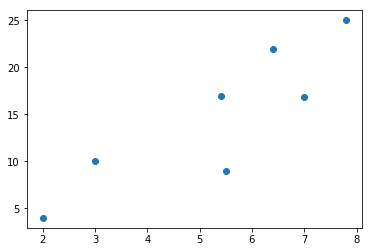

In [65]:
plt.scatter(x,y)

In [68]:
b1=np.cov(x,y,ddof=1)/np.var(x,ddof=1)
b1

array([[ 1.        ,  3.10609481],
       [ 3.10609481, 12.71761797]])

In [70]:
beta1=np.sum((x-np.mean(x))*(y-np.mean(y)))/np.sum((x-np.mean(x))**2)
beta1

3.106094808126411

In [71]:
#intercept
beta0=np.mean(y)-beta1*np.mean(x)
beta0

-1.6337310544985488

In [72]:
#Regression equation

In [73]:
y_pred=beta0+beta1*x
y_pred

array([ 4.57845856,  7.68455337, 15.44979039, 15.13918091, 18.24527572,
       20.1089326 , 22.59380845])

In [75]:
import seaborn as sns

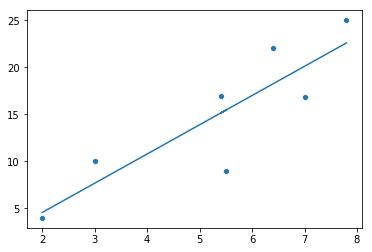

In [78]:
sns.scatterplot(x,y)
plt.plot(x,y_pred)

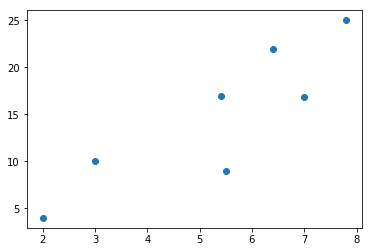

In [91]:
plt.scatter(x,y)

In [93]:
#Alternate method

In [84]:
import statsmodels.formula.api as smf

In [95]:
model=smf.ols('y~x',df).fit()
t=model.predict(df.x)
t

0     4.578459
1     7.684553
2    15.449790
3    15.139181
4    18.245276
5    20.108933
6    22.593808
dtype: float64

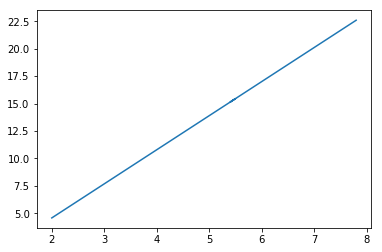

In [96]:
plt.plot(x,t)   ######

In [ ]:
# Scikit learn approach

In [97]:
from sklearn.linear_model import LinearRegression

In [105]:


x=df[["x"]]
y=df["y"]
LR=LinearRegression()



LR.fit(x,y)
LR.predict(x)

array([ 4.57845856,  7.68455337, 15.44979039, 15.13918091, 18.24527572,
       20.1089326 , 22.59380845])

In [106]:
df=pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


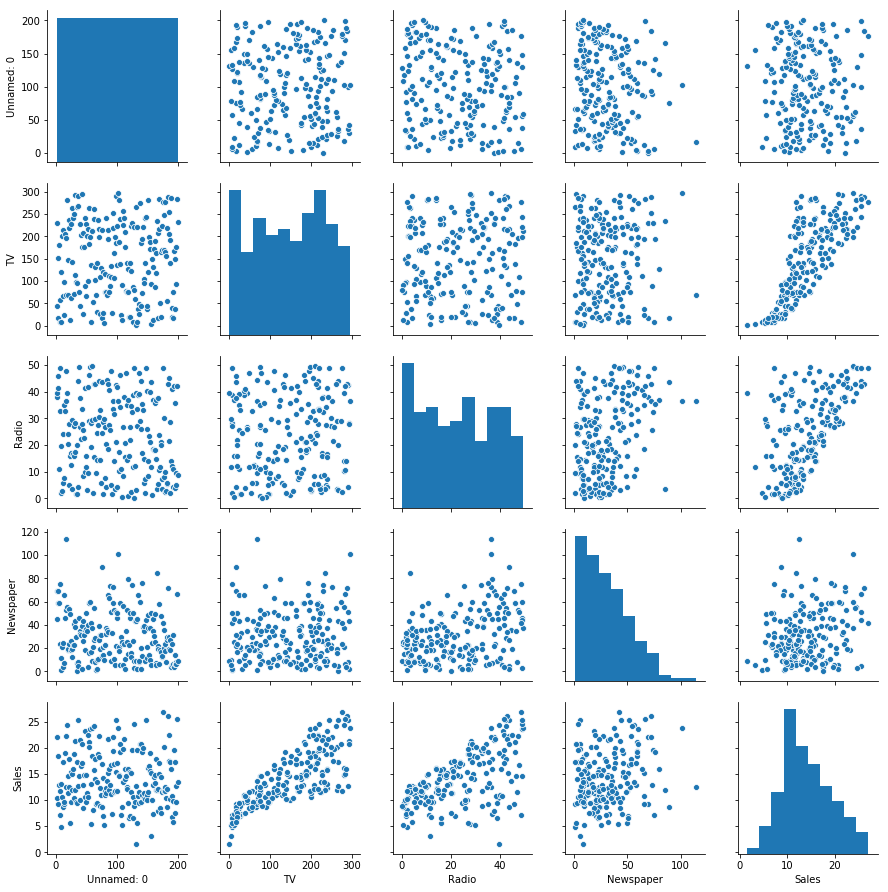

In [115]:
sns.pairplot(data=df)

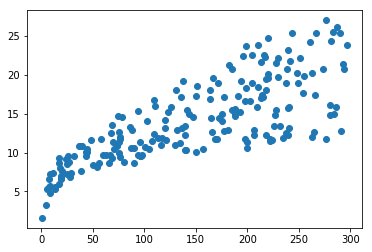

In [110]:
plt.scatter(df["TV"],df["Sales"])

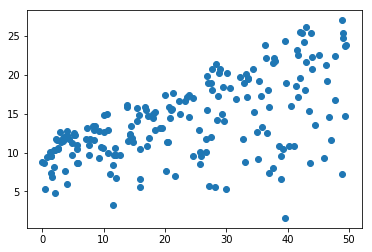

In [111]:
plt.scatter(df["Radio"],df["Sales"])

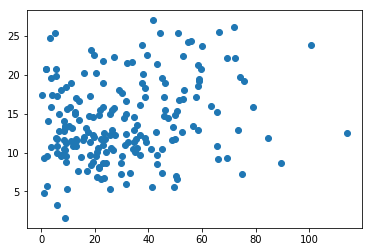

In [112]:
plt.scatter(df["Newspaper"],df["Sales"])

In [116]:
# To build a good model , your independent variables should be strongly co related.

In [117]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


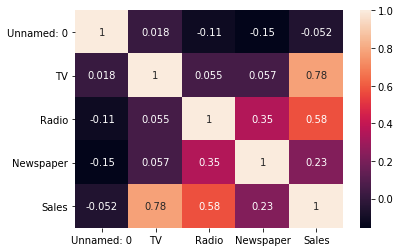

In [118]:
sns.heatmap(df.corr(),annot=True)

In [119]:
#Using ols method, fit a model.
#sales=beta0+beta1*TV+beta2*radio+beta3*newspapers

In [120]:
model=smf.ols("Sales~TV+Radio+Newspaper",df).fit()

In [122]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 29 Aug 2019   Prob (F-statistic):           1.58e-96
Time:                        15:59:42   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
#Remove newspaper: since , it fails to reject null hypothesis. check p value in summary.

In [124]:
model=smf.ols("Sales~TV+Radio",df).fit()

In [125]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 29 Aug 2019   Prob (F-statistic):           4.83e-98
Time:                        16:02:51   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
# to know beta0,beta1 and beta2 check coef values in summary thing.
# intercept is beta0
#for TV, beta1
# for radio, beta2

In [129]:
#Performance of regression model: 


In [130]:
model=smf.ols("Sales~TV+Radio",df).fit()

In [131]:
sales_pred=model.predict(df[["TV","Radio"]])

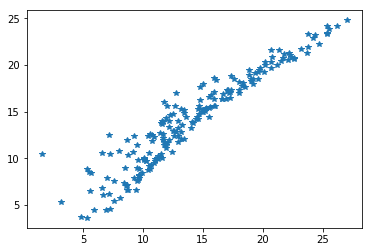

In [133]:
plt.plot(df.Sales,sales_pred,"*")

In [134]:
# R-squared:	0.897 ### check summary

In [135]:
model=smf.ols("Sales~Radio",df).fit()

In [136]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 29 Aug 2019   Prob (F-statistic):           4.35e-19
Time:                        16:14:15   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
#dropping TV affects the model.Drastically, R squared value has decreased. So, dont drop, just invest more on radio

In [140]:
model=smf.ols("Sales~TV",df).fit()

In [141]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 29 Aug 2019   Prob (F-statistic):           1.47e-42
Time:                        16:15:46   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Higher R square value, higher the performance

In [144]:
#RMSE : smaller rmse, smaller error

In [143]:
np.sqrt(np.sum((df["Sales"]-sales_pred)**2)/df.shape[0])

1.668703059366193

In [145]:
#Its high. not good

In [146]:
# Using scikit learn approach

In [148]:
x=df[['TV',"Radio"]]
y=df["Sales"]

In [150]:
LM=LinearRegression()



LM.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [152]:
# Rsquared score is your LM SCORE

In [151]:
LM.score(x,y)

0.8971942610828956

In [157]:
from sklearn import metrics

In [161]:
y_pred=LM.predict(x)

In [162]:
np.sqrt(metrics.mean_squared_error(y,y_pred))

1.668703059366193

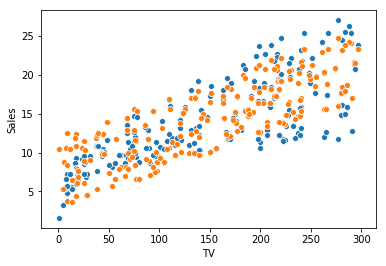

In [163]:
sns.scatterplot(df.TV,y)
sns.scatterplot(df.TV,y_pred)